# Chapter 3
Calculate customer lifetime value.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import zipfile
from urllib.request import urlretrieve

url = 'https://assets.datacamp.com/production/repositories/3202/datasets/40378e0b8f88bffddc938f335bc68baa8fdf0b18/chapter_1.zip'
file = 'data_zip.zip'
urlretrieve(url, file)

with zipfile.ZipFile(file, 'r') as zipref:
    zipref.extractall('./data_zip/')
    
cohort_counts = pd.read_csv('./data_zip/cohort_counts.csv', index_col='CohortMonth')
cohort_counts

,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,716.0,246.0,221.0,251.0,245.0,285.0,249.0,236.0,240.0,265.0,254.0,348.0,172.0
2011-01-01,332.0,69.0,82.0,81.0,110.0,90.0,82.0,86.0,104.0,102.0,124.0,45.0,NaN
2011-02-01,316.0,58.0,57.0,83.0,85.0,74.0,80.0,83.0,86.0,95.0,28.0,NaN,NaN
2011-03-01,388.0,63.0,100.0,76.0,83.0,67.0,98.0,85.0,107.0,38.0,NaN,NaN,NaN
2011-04-01,255.0,49.0,52.0,49.0,47.0,52.0,56.0,59.0,17.0,NaN,NaN,NaN,NaN
2011-05-01,249.0,40.0,43.0,36.0,52.0,58.0,61.0,22.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,207.0,33.0,26.0,41.0,49.0,62.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,173.0,28.0,31.0,38.0,44.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,139.0,30.0,28.0,35.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Extract cohort sizes from the first column of cohort_counts
cohort_sizes = cohort_counts.iloc[:,0]

# Calculate retention by dividing the counts with the cohort sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Calculate churn
churn = 1 - retention

# Print the retention table
print(retention)

               1         2         3         4         5         6         7  \
CohortMonth                                                                    
2010-12-01   1.0  0.343575  0.308659  0.350559  0.342179  0.398045  0.347765   
2011-01-01   1.0  0.207831  0.246988  0.243976  0.331325  0.271084  0.246988   
2011-02-01   1.0  0.183544  0.180380  0.262658  0.268987  0.234177  0.253165   
2011-03-01   1.0  0.162371  0.257732  0.195876  0.213918  0.172680  0.252577   
2011-04-01   1.0  0.192157  0.203922  0.192157  0.184314  0.203922  0.219608   
2011-05-01   1.0  0.160643  0.172691  0.144578  0.208835  0.232932  0.244980   
2011-06-01   1.0  0.159420  0.125604  0.198068  0.236715  0.299517  0.091787   
2011-07-01   1.0  0.161850  0.179191  0.219653  0.254335  0.098266       NaN   
2011-08-01   1.0  0.215827  0.201439  0.251799  0.100719       NaN       NaN   
2011-09-01   1.0  0.200717  0.279570  0.121864       NaN       NaN       NaN   
2011-10-01   1.0  0.210692  0.094340    

In [27]:
# Calculate the mean retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate the mean churn rate
churn_rate = churn.iloc[:,1:].mean().mean()

# Print rounded retention and churn rates
print('Retention rate: {:.2f}; Churn rate: {:.2f}'.format(retention_rate, churn_rate))

Retention rate: 0.24; Churn rate: 0.76


In [29]:
online = pd.read_csv('./data_zip/online.csv', index_col=0)
online['InvoiceDate_dt'] = pd.to_datetime(online['InvoiceDate'])
online['InvoiceMonth'] = online['InvoiceDate_dt'].dt.strftime("%Y-%m")
online['TotalSum'] = online['Quantity'] * online['UnitPrice']
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_dt,InvoiceMonth,TotalSum
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25 08:26:00,2011-10,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20 11:56:00,2011-11,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,2011-07,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,2011-11,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25 13:36:00,2011-05,17.85


In [30]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum()

# Calculate average monthly spend
monthly_revenue = np.mean(monthly_revenue)

# Define lifespan to 36 months
lifespan_months = 36

# Calculate basic CLV
clv_basic = monthly_revenue * lifespan_months

# Print the basic CLV value
print('Average basic CLV is {:.1f} USD'.format(clv_basic))

Average basic CLV is 4774.6 USD


In [33]:
# Calculate average revenue per invoice
revenue_per_purchase = online.groupby(['InvoiceNo'])['TotalSum'].mean().mean()

# Calculate average number of unique invoices per customer per month
frequency_per_month = online.groupby(['CustomerID','InvoiceMonth'])['InvoiceNo'].nunique().mean()

# Define lifespan to 36 months
lifespan_months = 36

# Calculate granular CLV
clv_granular = revenue_per_purchase * frequency_per_month * lifespan_months

# Print granular CLV value
print('Average granular CLV is {:.1f} USD'.format(clv_granular))

Average granular CLV is 1635.2 USD


In [34]:
# Calculate monthly spend per customer
monthly_revenue = online.groupby(['CustomerID','InvoiceMonth'])['TotalSum'].sum().mean()

# Calculate average monthly retention rate
retention_rate = retention.iloc[:,1:].mean().mean()

# Calculate average monthly churn rate
churn_rate = 1 - retention_rate

# Calculate traditional CLV 
clv_traditional = monthly_revenue * (retention_rate / churn_rate)

# Print traditional CLV and the retention rate values
print('Average traditional CLV is {:.1f} USD at {:.1f} % retention_rate'.format(clv_traditional, retention_rate*100))

Average traditional CLV is 42.4 USD at 24.2 % retention_rate


## Recency, frequency, monetary value models
I need to do some transformation to match the data of online_X

In [ ]:
# Add aquisition month and cohort index


In [83]:
first_invoice = online.groupby(['CustomerID'])['InvoiceDate_dt'].min().dt.strftime("%Y-%m")
first_invoice = first_invoice.rename('AcquisitionDate')

In [84]:
online_merge = pd.merge(online, first_invoice, how='left',
                        on='CustomerID')

In [85]:
online_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 0 to 70863
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceNo        70864 non-null  int64         
 1   StockCode        70864 non-null  object        
 2   Description      70864 non-null  object        
 3   Quantity         70864 non-null  int64         
 4   InvoiceDate      70864 non-null  object        
 5   UnitPrice        70864 non-null  float64       
 6   CustomerID       70864 non-null  int64         
 7   Country          70864 non-null  object        
 8   InvoiceDate_dt   70864 non-null  datetime64[ns]
 9   InvoiceMonth     70864 non-null  object        
 10  TotalSum         70864 non-null  float64       
 11  AcquisitionDate  70864 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 7.0+ MB


In [86]:
online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70864 entries, 416792 to 312243
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   InvoiceNo       70864 non-null  int64         
 1   StockCode       70864 non-null  object        
 2   Description     70864 non-null  object        
 3   Quantity        70864 non-null  int64         
 4   InvoiceDate     70864 non-null  object        
 5   UnitPrice       70864 non-null  float64       
 6   CustomerID      70864 non-null  int64         
 7   Country         70864 non-null  object        
 8   InvoiceDate_dt  70864 non-null  datetime64[ns]
 9   InvoiceMonth    70864 non-null  object        
 10  TotalSum        70864 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 6.5+ MB


In [87]:
# I need to enumarate the sorted list of dates
cohort_lookup = [(d, n+1) for (n, d) in enumerate(first_invoice.sort_values().unique())]
cohort_lookup_df = pd.DataFrame(cohort_lookup, columns=['AcquisitionDate', 'CohortIndex'])
online_cohort = pd.merge(online_merge, cohort_lookup_df, how='left',
                         on='AcquisitionDate')

In [88]:
online_cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_dt,InvoiceMonth,TotalSum,AcquisitionDate,CohortIndex
0,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25 08:26:00,2.10,14286,United Kingdom,2011-10-25 08:26:00,2011-10,12.60,2011-04,5
1,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20 11:56:00,1.45,16360,United Kingdom,2011-11-20 11:56:00,2011-11,1.45,2011-09,10
2,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14 13:35:00,3.75,13933,United Kingdom,2011-07-14 13:35:00,2011-07,22.50,2011-07,8
3,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23 15:53:00,2.10,17290,United Kingdom,2011-11-23 15:53:00,2011-11,2.10,2011-11,12
4,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25 13:36:00,5.95,17663,United Kingdom,2011-05-25 13:36:00,2011-05,17.85,2011-02,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70859,575063,22804,PINK HANGING HEART T-LIGHT HOLDER,1,2011-11-08 12:32:00,2.95,16764,United Kingdom,2011-11-08 12:32:00,2011-11,2.95,2011-07,8
70860,537963,21733,RED HANGING HEART T-LIGHT HOLDER,12,2010-12-09 11:30:00,2.95,13369,United Kingdom,2010-12-09 11:30:00,2010-12,35.40,2010-12,1
70861,560089,23238,SET OF 4 KNICK KNACK TINS LONDON,1,2011-07-14 16:45:00,4.15,12748,United Kingdom,2011-07-14 16:45:00,2011-07,4.15,2010-12,1
70862,554103,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-05-22 13:51:00,2.95,15555,United Kingdom,2011-05-22 13:51:00,2011-05,5.90,2010-12,1


In [130]:
# Use one datetime column
online_cohort['InvoiceDate'] = online_cohort['InvoiceDate_dt']
online_cohort.drop(['InvoiceDate_dt'], axis=1, inplace=True)

In [132]:
# Sanity check sample of invoice data to first order, and cohort
idx = online_cohort['CustomerID'] == 14286
online_cohort[idx].sort_values(by='InvoiceDate').tail(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalSum,AcquisitionDate,CohortIndex
21635,572558,21507,ELEPHANT BIRTHDAY CARD,12,2011-10-25 08:26:00,0.42,14286,United Kingdom,2011-10,5.04,2011-04,5
35824,572558,22986,WRAP GINGHAM ROSE,25,2011-10-25 08:26:00,0.42,14286,United Kingdom,2011-10,10.50,2011-04,5
19326,576650,23373,VINTAGE CHRISTMAS PAPER GIFT BAG,20,2011-11-16 10:34:00,0.82,14286,United Kingdom,2011-11,16.40,2011-04,5
28515,576650,22564,ALPHABET STENCIL CRAFT,12,2011-11-16 10:34:00,1.25,14286,United Kingdom,2011-11,15.00,2011-04,5
4205,576650,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,2011-11-16 10:34:00,1.95,14286,United Kingdom,2011-11,19.50,2011-04,5
30660,576650,22732,3D VINTAGE CHRISTMAS STICKERS,18,2011-11-16 10:34:00,1.25,14286,United Kingdom,2011-11,22.50,2011-04,5
64282,576650,20973,12 PENCIL SMALL TUBE WOODLAND,24,2011-11-16 10:34:00,0.65,14286,United Kingdom,2011-11,15.60,2011-04,5
35300,576650,23510,MINI PLAYING CARDS GYMKHANA,20,2011-11-16 10:34:00,0.42,14286,United Kingdom,2011-11,8.40,2011-04,5
24625,576650,23438,RED SPOT GIFT BAG LARGE,24,2011-11-16 10:34:00,1.25,14286,United Kingdom,2011-11,30.00,2011-04,5
10746,576650,23194,GYMKHANA TREASURE BOOK BOX,8,2011-11-16 10:34:00,2.25,14286,United Kingdom,2011-11,18.00,2011-04,5


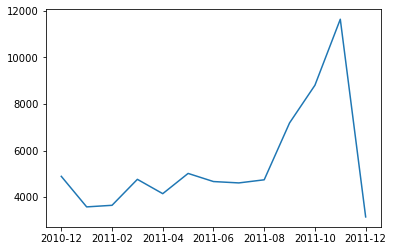

In [133]:
online_cohort['InvoiceMonth'].value_counts().sort_index().plot()
plt.show()

Train a model that predicts the next invoice. We can do this by making our target the last invoice a customer raised, and use all the previous invoices to train the model. This is a common approach with timeseries model training.

This is a delicious challenge to solve.

Got it - group by customer, and find the max invoiceid. Then use this as an positive and negative index to split the frame.

Hurrah

In [134]:
last_invoices = online_cohort.groupby('CustomerID')['InvoiceNo'].max()

In [135]:
last_invoices

CustomerID
12747    581163
12748    581580
12749    580750
12820    580973
12822    569024
          ...  
18280    545712
18281    556464
18282    580173
18283    580872
18287    573167
Name: InvoiceNo, Length: 3701, dtype: int64

In [136]:
idx = online_cohort['InvoiceNo'].isin(last_invoices)
online_Y = online_cohort[idx]
online_X = online_cohort[~idx]

In [137]:
online_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18033 entries, 5 to 70863
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceNo        18033 non-null  int64         
 1   StockCode        18033 non-null  object        
 2   Description      18033 non-null  object        
 3   Quantity         18033 non-null  int64         
 4   InvoiceDate      18033 non-null  datetime64[ns]
 5   UnitPrice        18033 non-null  float64       
 6   CustomerID       18033 non-null  int64         
 7   Country          18033 non-null  object        
 8   InvoiceMonth     18033 non-null  object        
 9   TotalSum         18033 non-null  float64       
 10  AcquisitionDate  18033 non-null  object        
 11  CohortIndex      18033 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.8+ MB


In [138]:
online_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52831 entries, 0 to 70862
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceNo        52831 non-null  int64         
 1   StockCode        52831 non-null  object        
 2   Description      52831 non-null  object        
 3   Quantity         52831 non-null  int64         
 4   InvoiceDate      52831 non-null  datetime64[ns]
 5   UnitPrice        52831 non-null  float64       
 6   CustomerID       52831 non-null  int64         
 7   Country          52831 non-null  object        
 8   InvoiceMonth     52831 non-null  object        
 9   TotalSum         52831 non-null  float64       
 10  AcquisitionDate  52831 non-null  object        
 11  CohortIndex      52831 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 5.2+ MB


In [139]:
52831+18033 

70864

In [140]:
import datetime as dt

In [152]:
# Define the snapshot date
NOW = dt.datetime(2011,11,1)

# Calculate recency by subtracting current date from the latest InvoiceDate
features = online.groupby('CustomerID').agg({
  'InvoiceDate_dt': lambda x: (NOW - x.max()).days,
  # Calculate frequency by counting unique number of invoices
  'InvoiceNo': pd.Series.nunique,
  # Calculate monetary value by summing all spend values
  'TotalSum': np.sum,
  # Calculate average and total quantity
  'Quantity': ['mean', 'sum']}).reset_index()

# Rename the columns
features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']

In [153]:
# Build a pivot table counting invoices for each customer monthly
cust_month_tx = pd.pivot_table(data=online, values='InvoiceNo',
                               index=['CustomerID'], columns=['InvoiceMonth'],
                               aggfunc=pd.Series.nunique, fill_value=0)

# Store November 2011 data column name as a list
target = ['2011-11']

# Store target value as `Y`
Y = cust_month_tx[target]

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
# Store customer identifier column name as a list
custid = ['CustomerID']

# Select feature column names excluding customer identifier
cols = [col for col in features.columns if col not in custid]

# Extract the features as `X`
X = features[cols]

# Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=99)

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(train_X, train_Y)
pred_Y = linreg.predict(test_X)

print(mean_squared_error(test_Y, pred_Y)**0.5)
print(mean_absolute_error(test_Y, pred_Y))
print(r2_score(test_Y, pred_Y))

0.6141246279483243
0.4587339576778415
0.4446149591317501


In [161]:
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

In [162]:
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 0.7666725631766099; RMSE test: 0.6141246279483243
MAE train: 0.4881421025942814, MAE test: 0.4587339576778415


In [172]:
# Import `statsmodels.api` module
import statsmodels.api as sm

# Initialize model instance on the training data
olsreg = sm.OLS(train_Y.to_numpy(), train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.650
Model:                            OLS   Adj. R-squared (uncentered):              0.649
Method:                 Least Squares   F-statistic:                              1029.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):                        0.00
Time:                        12:30:48   Log-Likelihood:                         -3230.3
No. Observations:                2775   AIC:                                      6471.
Df Residuals:                    2770   BIC:                                      6500.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------